In [173]:
# import librairies
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv
#from data_collection import get_crypo_from_API
import plotly.graph_objects as go
from datetime import datetime, timedelta
import montecarlo as mc
import warnings
import json
from urllib.request import Request, urlopen
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

### **CRYTPTO PORTFOLIO**
---
The current project is based on single year historical data to provide an analysis of a hyporthetical portfolio of crypto assets to help guide a new investor.

We obtained our data mainly from yahoo finance and API and make the code modular by the use of functions

In [178]:
# defining tickers
tickers = ['BTC', 'ETH', 'DOGE', 'SUSHI','USDT']


# List of portfolio Crypto Currency
load_dotenv
api_key = os.environ.get("IEX_TOKEN")

def read_json(url):
    request = Request(url)
    response = urlopen(request)
    #print(response)
    data = response.read()
    #print(data)
    url2 = json.loads(data)
    return url2

def get_joined_close(dataframe):

    cols = [c for c in dataframe.columns if c.lower()[:5] == 'close']
    daily_close_df=dataframe[cols]

    return daily_close_df

def plot_mont_carl(monte_carlo_sim):
    plot_title = f"Monte-Carlo Simulation of Portfolio"
    monte_carlo_sim_plot = monte_carlo_sim.hvplot(title=plot_title,figsize=(18,10),legend=False)
    return monte_carlo_sim_plot


In [139]:
#Read in the crypto data into a Pandas DataFrame

Euthereum_data = pd.read_csv(Path("Resources/ETH-USD.csv"), index_col='Date')
Doge_data = pd.read_csv(Path("Resources/DOGE-USD.csv"), index_col='Date')
Bitcoin_data = pd.read_csv(Path("Resources/BTC-USD.csv"), index_col='Date')
Sushi_data = pd.read_csv(Path("Resources/SUSHI-USD.csv"), index_col='Date')
Tether_data = pd.read_csv(Path("Resources/USDT-USD.csv"), index_col='Date')

#create ticker data
Euthereum_data['ticker']='ETH'
Doge_data['ticker']='DOGE'
Bitcoin_data['ticker']='BTC'
Sushi_data['ticker']='SUSHI'
Tether_data['ticker']='USDT'

#concatenate files into a single volume data frame using date as an index in order to plot volume data
volume_data=pd.concat([Euthereum_data,Bitcoin_data,Doge_data,Sushi_data,Tether_data],axis='rows').loc[:,['Volume','ticker']].dropna()
volume_data.reset_index(inplace=True)
volume_data.head()

,Date,Volume,ticker
0,2020-10-06,11497841885.00,ETH
1,2020-10-07,10537119715.00,ETH
2,2020-10-08,11511016796.00,ETH
3,2020-10-10,13618484324.00,ETH
4,2020-10-11,12584512533.00,ETH


## Data Cleaning & Aquisitions



In [140]:
Euthereum_data.columns = ['ETH Open', 'ETH High', 'ETH Low', 'ETH Close', 'ETH Adj Close', 'ETH Volume','ticker']
Doge_data.columns = ['DOGE Open', 'DOGE High', 'DOGE Low', 'DOGE Close', 'DOGE Adj Close', 'DOGE Volume','ticker']
Bitcoin_data.columns = ['BTC Open', 'BTC High', 'BTC Low', 'BTC Close', 'BTC Adj Close', 'BTC Volume','ticker'] 
Sushi_data.columns = ['SUSHI Open', 'SUSHI High', 'SUSHI Low', 'SUSHI Close', 'SUSHI Adj Close', 'SUSHI Volume','ticker'] 
Tether_data.columns = ['USDT Open', 'USDT High', 'USDT Low', 'USDT Close', 'USDT Adj Close', 'USDT Volume','ticker'] 
Tether_data.head()

,USDT Open,USDT High,USDT Low,USDT Close,USDT Adj Close,USDT Volume,ticker
Date,,,,,,,
2020-10-06,1.00,1.01,1.00,1.00,1.00,36772723041.00,USDT
2020-10-07,1.00,1.01,1.00,1.00,1.00,28509871425.00,USDT
2020-10-08,1.00,1.01,0.99,1.00,1.00,33458865269.00,USDT
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,USDT
2020-10-10,1.00,1.00,1.00,1.00,1.00,41298643279.00,USDT


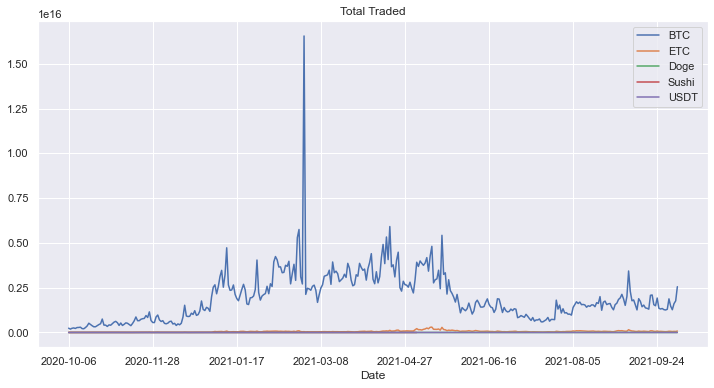

In [141]:
Bitcoin_data['Total Traded'] = Bitcoin_data['BTC Open'] * Bitcoin_data['BTC Volume']
Bitcoin_data.dropna(inplace=True)
Bitcoin_data.drop(columns='ticker', inplace=True)
 
Euthereum_data['Total Traded'] = Euthereum_data['ETH Open'] * Euthereum_data['ETH Volume']
Euthereum_data.dropna(inplace=True)
Euthereum_data.drop(columns='ticker', inplace=True)
 
Doge_data['Total Traded'] = Doge_data['DOGE Open'] * Doge_data['DOGE Volume']
Doge_data.dropna(inplace=True)
Doge_data.drop(columns='ticker', inplace=True)
 
Sushi_data['Total Traded'] = Sushi_data['SUSHI Open'] * Sushi_data['SUSHI Volume']
Sushi_data.dropna(inplace=True)
Sushi_data.drop(columns='ticker', inplace=True)
 
Tether_data['Total Traded'] = Tether_data['USDT Open'] * Tether_data['USDT Volume']
Tether_data.dropna(inplace=True)
Tether_data.drop(columns='ticker', inplace=True)

#Trade_data=pd.concat([Euthereum_data,Bitcoin_data,Doge_data,Sushi_data,Tether_data],axis='rows').loc[:,['Total Traded','ticker']].dropna()
#Trade_data.reset_index(inplace=True)


fig = plt.figure(figsize = (12, 6))
plt.title('Total Traded')

Bitcoin_data['Total Traded'].plot(label = 'BTC')
Euthereum_data['Total Traded'].plot(label = 'ETC')
Doge_data['Total Traded'].plot(label = 'Doge')
Sushi_data['Total Traded'].plot(label = 'Sushi')
Tether_data['Total Traded'].plot(label = 'USDT')
plt.legend()



*Not surprising at all to see Bitcoin as the most traded coin, looks like there was a high amount traded around February along with a little rise in the number Euthereum of totally traded between April/May (the period around which it reached its highest value)*

In [142]:
Crypto_data = pd.concat([Euthereum_data, Doge_data, Bitcoin_data, Sushi_data, Tether_data], axis="columns", join="inner").dropna()
Crypto_data.describe()

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume,Total Traded,DOGE Open,DOGE High,DOGE Low,...,SUSHI Adj Close,SUSHI Volume,Total Traded,USDT Open,USDT High,USDT Low,USDT Close,USDT Adj Close,USDT Volume,Total Traded
count,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,...,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00
mean,2522.32,2624.88,2408.89,2530.86,2530.86,27096181918.61,72821726673370.72,0.25,0.27,0.23,...,10.38,432428806.75,5423760310.71,1.00,1.00,1.00,1.00,1.00,88724639606.41,88780547566.95
std,886.92,922.39,847.48,888.56,888.56,12873118179.04,49646680511046.30,0.13,0.15,0.12,...,4.19,374480771.94,6394152226.31,0.00,0.00,0.00,0.00,0.00,46717738673.50,46775105667.76
min,341.09,342.59,335.53,341.02,341.02,10537119715.00,3594123813264.87,0.00,0.00,0.00,...,0.62,14098346.00,9360921.09,1.00,1.00,0.99,1.00,1.00,28509871425.00,28557882048.48
25%,2133.11,2193.36,2054.14,2138.50,2138.50,18307095839.00,46826130741887.48,0.20,0.21,0.19,...,8.15,219492233.75,1821059591.50,1.00,1.00,1.00,1.00,1.00,55433675337.25,55427668106.69
50%,2532.25,2653.41,2402.14,2537.05,2537.05,23805484449.50,63911158421306.05,0.25,0.26,0.24,...,10.82,341564249.00,3735238341.65,1.00,1.00,1.00,1.00,1.00,77363753748.50,77391295647.71
75%,3213.33,3300.52,3069.89,3224.51,3224.51,31886485436.00,83081851811515.16,0.32,0.33,0.30,...,13.23,523265027.00,6599899353.45,1.00,1.00,1.00,1.00,1.00,100285985201.75,100372615373.91
max,4174.64,4362.35,3868.99,4168.70,4168.70,84482912776.00,300180370644222.88,0.69,0.74,0.61,...,21.44,2720807434.00,58517910089.55,1.01,1.03,1.00,1.01,1.01,279067455600.00,279240477422.47


In [143]:
#Find the Cumulative Returns
Crypto_data[['ETH Close','BTC Close','DOGE Close','SUSHI Close','USDT Close']].pct_change().dropna()
Crypto_Daily_Returns=Crypto_data[['ETH Close','BTC Close','DOGE Close','SUSHI Close','USDT Close']].pct_change().dropna()

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

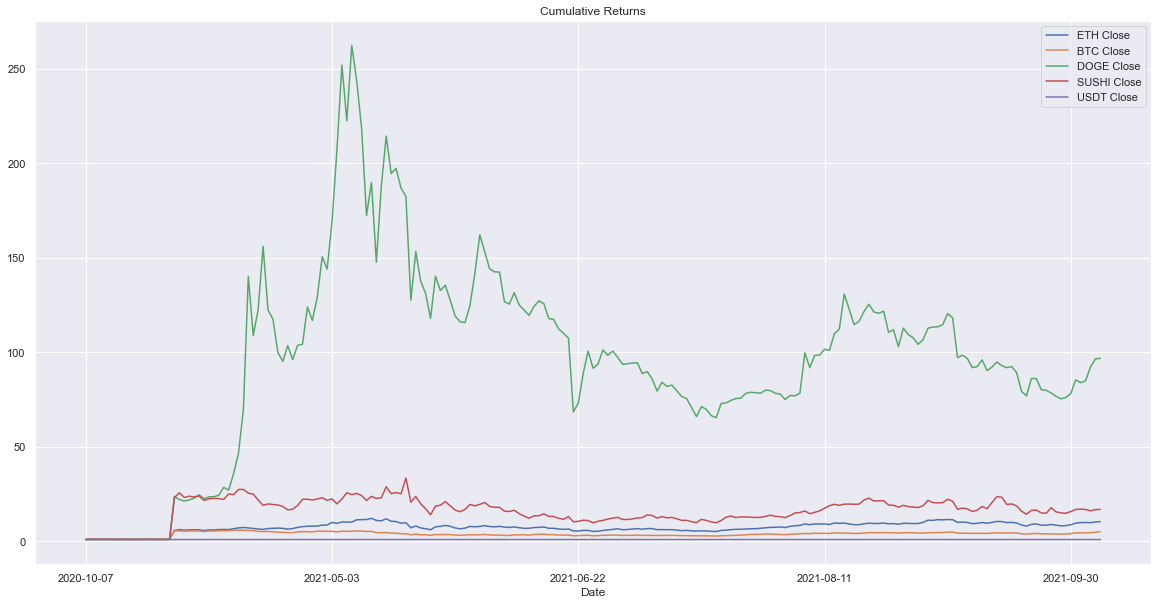

In [144]:
#Plot the cumulative Returns
(1+Crypto_Daily_Returns).cumprod().plot(figsize=(20, 10), title="Cumulative Returns")

## *Growth dominated by lower capitalization and Meme coins*

As we can see with the plot of the cummulative returns over the period of *oct-2020* to *oct-2021*, shows SUSHI and DogeCoin as the assets with the highest levels of growth. One argument in favor of including these types of assets in our portfolio in combination with blue chip assets like Bitcoin and Ethereum.

Text(0.5, 1.0, 'Daily return distribution per assets')

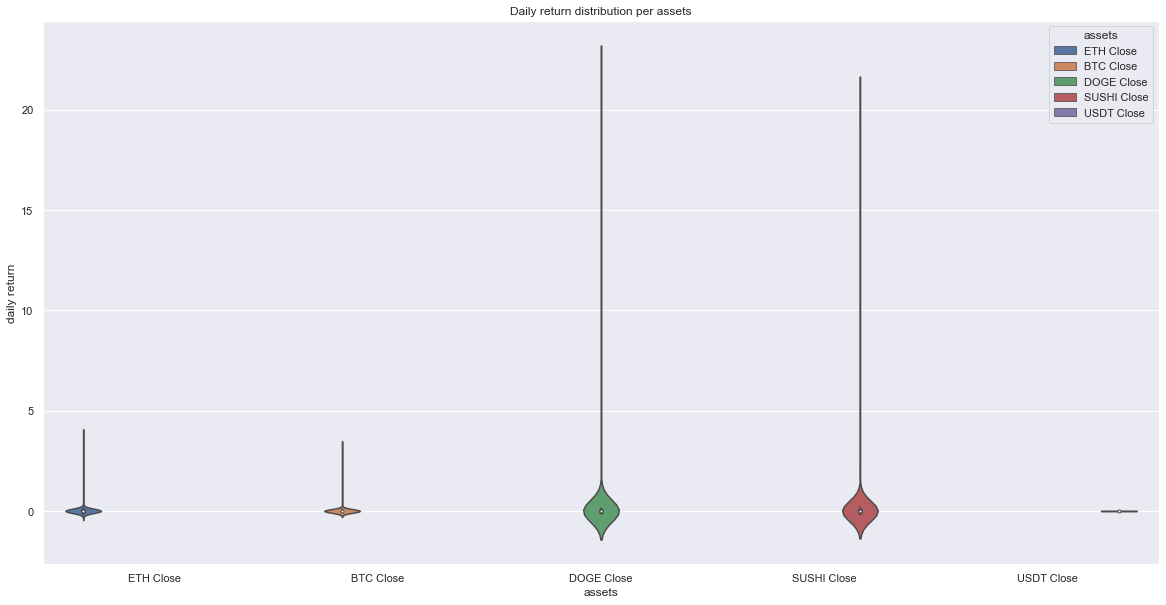

In [145]:
# we look at the distribution of the daily returns to see outliers and volatility
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel")

t=sns.load_dataset("tips")

Crypto_Daily_Returns=Crypto_data[['ETH Close','BTC Close','DOGE Close','SUSHI Close','USDT Close']].pct_change().dropna().reset_index()
Crypto_Daily_Returns_unpivoted=Crypto_Daily_Returns.melt(id_vars='Date',var_name='assets',value_name='daily return').set_index('Date')
Crypto_Daily_Returns_unpivoted.index=pd.DatetimeIndex(Crypto_Daily_Returns_unpivoted.index)
Crypto_Daily_Returns_unpivoted.index.year



sns.set(rc = {'figure.figsize':(20,10)})
sns.violinplot(x="assets", y="daily return",
            hue="assets", 
            data=Crypto_Daily_Returns_unpivoted).set_title("Daily return distribution per assets")
#t

The boxplot shows the presence of a lot of outlier data in meme coins (Doge) and low Cap coins (Sushi). the dispersion of data around the mean daily returns seems less pronounced in blue chip large cap coins. 

In [146]:

Crypto_Daily_Returns.std().sort_values(ascending=False)


DOGE Close    1.54
SUSHI Close   1.44
ETH Close     0.28
BTC Close     0.23
USDT Close    0.00
dtype: float64

Volatility is confirmed  by the observations in the violon plot showing more volatility in meme and low cap coins

<AxesSubplot:>

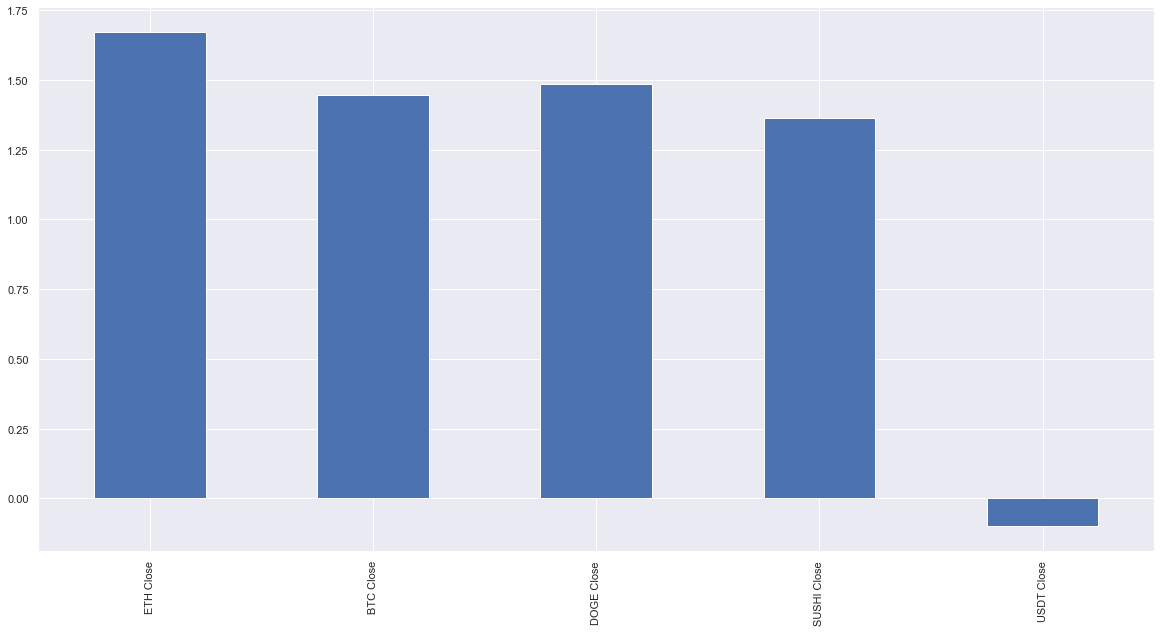

In [147]:
#Ploting the Sharpe ratio
annual_std = Crypto_Daily_Returns.std()* np.sqrt(365)
sharpe_ratios=(Crypto_Daily_Returns.mean()*365)/annual_std
sharpe_ratios.plot.bar('Sharpe Ratios')


The data suggests that the highest sharpe ratios is in Ethereum which would indicate making the portfolio overweight in ETH. The stablecoin (USDT) as expected has a sharpe ratio closer to 0 indicating using it to reduce volatility in the portfolio

In [148]:


test=volume_data
test['year-month']=test['Date'].str.slice(0,7,1)
test['year']=test['Date'].str.slice(0,4,1)
test

test.hvplot.line(x='Date',y='Volume',xlabel='Date',ylabel='Volume',title='Intraday Volume',by='ticker',figsize=(500,100),groupby='year')






BokehModel(combine_events=True, render_bundle={'docs_json': {'d9e90ce4-1d37-4a4b-bc2e-1c8701d7dfb4': {'defs': …

:DynamicMap   [year]
   :NdOverlay   [ticker]
      :Curve   [Date]   (Volume)

In [149]:
Trade_data.head()
Trade_data['year']=test['Date'].str.slice(0,4,1)

Trade_data.hvplot.line(x='Date',y='Total Traded',xlabel='Date',ylabel='Daily Traded Total',title='Intraday Traded',by='ticker',figsize=(700,1000),groupby='year')

BokehModel(combine_events=True, render_bundle={'docs_json': {'ab3be9bb-e56d-44bf-9b24-032b5178a9a8': {'defs': …

:DynamicMap   [year]
   :NdOverlay   [ticker]
      :Curve   [Date]   (Total Traded)

We can see that the volatility is related to the traded volume. the bigger coins have highest trading activities. Bitcoin is more traded while USDT has the foremost amount of volume on exchanges



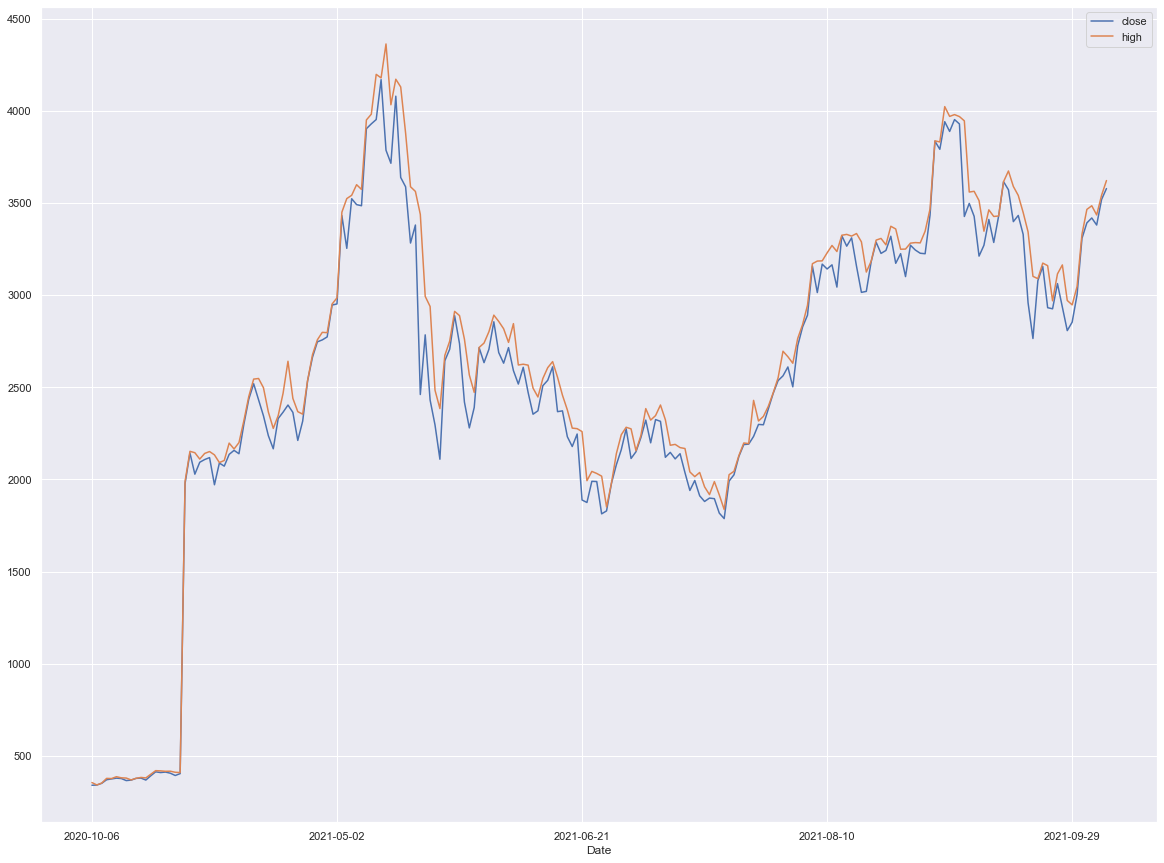

In [150]:
s_test= Crypto_data.loc[:,['ETH Close','ETH High']].dropna()
plt.figure(figsize=(20,15))

s_test['ETH Close'].plot(label='close')
s_test['ETH High'].plot(label='high')
plt.legend(loc='upper right')
plt.show()


# What is the optimal Portfolio for reducing exposure to volatility or to risk

In this section we compute the daily returns of the close prices for each asset and annualized the covariance matrix

In [151]:
#filter the columns use
col=['ETH Close','BTC Close','DOGE Close','USDT Close','SUSHI Close']
df=Crypto_data[col]

#rename the columns to tickers
df.rename(columns={'ETH Close':'ETH','BTC Close':'BTC','DOGE Close':'DOGE','USDT Close':'USDT','SUSHI Close':'SUSHI'},inplace=True)
df.index=pd.DatetimeIndex(df.index)

#compute percent change and covariance matrix
daily_returns=df.pct_change().dropna()
variance_matrix=len(daily_returns.index)*daily_returns.cov()


 We need to loop through multiple combinations of portfolio and store the returns and volatility encounterd in each scenario

In [152]:
#create empty list to store all returns, volatility and weights
port_returns=[]
port_volatility=[]
port_weights=[]

#find the number of assets to assign weight to
num_assets=len(daily_returns.columns)

#find the number of scenarios
num_portfolios=15000

#compute the expected return which is the mean of the retuns
individual_returns=df.pct_change().mean()*365#len(daily_returns.index)#df[(df.index=='2020-10-06')|(df.index=='2021-10-06')].pct_change().mean()*100

#print the annualized returns
individual_returns





ETH      8.83
BTC      6.50
DOGE    43.86
USDT    -0.00
SUSHI   37.50
dtype: float64

In [153]:
#we loop through each scenarios to find the weights, returns and volatility encountered
for port in range(num_portfolios):
    weights=np.random.random(num_assets)
    weights=weights/np.sum(weights)
    port_weights.append(weights)
    returns= np.dot(weights,individual_returns)
    port_returns.append(returns)

    var=variance_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    sd=np.sqrt(var)

    ann_sd=sd*np.sqrt(len(daily_returns.index))
    port_volatility.append(ann_sd)

In [154]:
#create dictionary to store all the retuns and their volatility from all the scenarios
data ={'returns':port_returns,'Volatility':port_volatility}
for counter,ticker in enumerate(df.columns.to_list()):
    data[ticker+' weight'] = [w[counter] for w in port_weights]


In [155]:
#create data frame from dictionnary
portfolio=pd.DataFrame(data)

In [156]:
#minimum volatility:
min_vol_port=portfolio.iloc[[portfolio['Volatility'].idxmin()]]

#highest sharpe ratio:
optimal_sharpe_portfolio=portfolio.loc[[((portfolio['returns']-0)/portfolio['Volatility']).idxmax()]]


In [157]:
min_weight_df=pd.DataFrame(min_vol_port.iloc[:,2:].unstack()).replace(' weight','').reset_index().rename(columns={'level_0':'ticker',0:'weight'}).drop('level_1',axis=1)
min_weight_df['ticker']= min_weight_df['ticker'].str.replace(' weight','')

optimal_weight_df=pd.DataFrame(optimal_sharpe_portfolio.iloc[:,2:].unstack()).replace(' weight','').reset_index().rename(columns={'level_0':'ticker',0:'weight'}).drop('level_1',axis=1)
optimal_weight_df['ticker']= optimal_weight_df['ticker'].str.replace(' weight','')


In [158]:
fig=px.pie(data_frame=min_weight_df,names='ticker',values='weight')
fig.update_layout(
    title='Weight of minimum volatility portfolio',
    font=dict(size=18 ))

We see the minimum variance portfolio is overweight in USDT.

In [159]:
#Output the results
print(f"the minimum Volatility portfolio annualized portfolio return is {pd.DataFrame(min_vol_port.reset_index()).returns[0]*100}%")
print(f'the annualized volatility is {pd.DataFrame(min_vol_port.reset_index()).Volatility[0]}')

the minimum Volatility portfolio annualized portfolio return is 365.40549680985765%
the annualized volatility is 25.869301588765317


In [160]:
#Plotting the weight of portfolio with the highest sharpe ratio
fig=px.pie(data_frame=optimal_weight_df,names='ticker',values='weight')
fig.update_layout(
    title='Weight of portfolio with highest sharpe ratio',
    font=dict(size=18 ))

In [161]:
print(f"the minimum Volatility portfolio annualized portfolio return is {pd.DataFrame(optimal_sharpe_portfolio.reset_index()).returns[0]*100}%")
print(f'the annualized volatility is {pd.DataFrame(optimal_sharpe_portfolio.reset_index()).Volatility[0]}')

the minimum Volatility portfolio annualized portfolio return is 543.7651249744122%
the annualized volatility is 36.432047588531134


In [ ]:
p1=portfolio.hvplot.scatter(x='Volatility',y='returns',xlabel='Volatility',ylabel='Expected return',legend='top',height=500,width=1000,title='Plot of all portfolios')
p2=optimal_sharpe_portfolio.hvplot.scatter(x='Volatility',y='returns',marker='o', alpha=.9,)
p3=min_vol_port.hvplot.scatter(x='Volatility',y='returns')
#p4=min_vol_port.hvplot.labels(x='Volatility',y='returns',text='minimum variance')
p1*p2*p3
